In [1]:
import cv2
print(cv2.__version__)


4.10.0


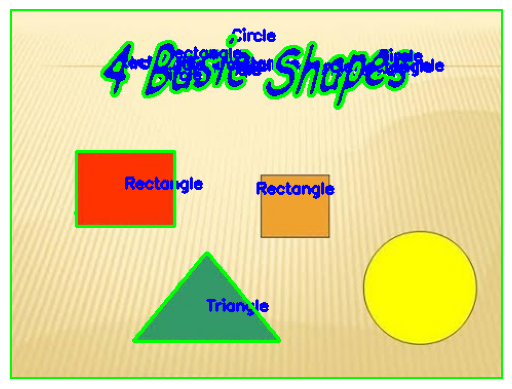

In [2]:
# Import libraries
import cv2        # For image processing
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization

# Step 1: Load the image (change 'images.png' if needed)
image = cv2.imread("basic.jpg")
if image is None:
    print("Image not found! Please ensure 'basic.jpg' is in the same directory.")
    exit()

# Step 2: Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Step 4: Thresholding to create a binary image
_, threshold = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

# Step 5: Detect contours in the binary image
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Function to classify shapes based on their contour
def detect_shape(contour):
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    if len(approx) == 3:
        return "Triangle"
    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w) / h
        return "Rectangle"
    elif len(approx) > 4:
        return "Circle"
    else:
        return "Unknown"

# Step 6: Annotate the detected shapes
for contour in contours:
    shape = detect_shape(contour)
    M = cv2.moments(contour)
    if M["m00"] != 0:  # Avoid division by zero
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        cv2.putText(image, shape, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)

# Step 7: Convert BGR image to RGB for Matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 8: Display the result using Matplotlib
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
